## Data Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#loaded data as well as airport data with information about the airports from https://datahub.io/core/airport-codes 

df = pd.read_csv('../data/Train.csv')
airport_data = pd.read_csv('../data/airport_data.csv', dtype={'continent': 'string'}, na_values=[''])
airport_data['continent'].fillna('NA', inplace=True)
df.columns = df.columns.str.lower()

In [3]:
df.head()

,id,datop,fltid,depstn,arrstn,std,sta,status,ac,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [4]:
#delete rows with status DEL, SCH, RTR, DEP
df = df[~df['status'].isin(['DEL', 'SCH', 'RTR', 'DEP'])]

### New columns (Airline, Time)

In [5]:
# df['route'] = df['depstn'] + '-' + df['arrstn']

In [6]:
#create new column airline
df['airline'] = df['ac'].apply(lambda x: x[:2])

In [7]:
# # Convert datop (date of flight) to datetime
# df['datop'] = pd.to_datetime(df['datop'], format="%Y-%m-%d", errors='coerce')

# Extract date from scheduled time departure (std) and confert to datetime and make new column std_date
df['std_date'] = pd.to_datetime(df['std']).dt.date

# Extract date from scheduled time departure (std) and confert to datetime and make new column std_date
df['sta_date'] = pd.to_datetime(df['std']).dt.date

# Extract time from scheduled time departure (std) and confert to datetime and make new column std_time
df['std_time'] = pd.to_datetime(df['std']).dt.strftime('%H:%M:%S')

# Extract time from scheduled time arrival (sta) and convert to datetime and make new column sta_time
df['sta_time'] = pd.to_datetime(df['sta'], format='%Y-%m-%d %H.%M.%S').dt.strftime('%H:%M:%S')

In [8]:
#make seasonal day of year, by extracting the day of the year from the date and transform it to a sinusoidal and cosine transformation as it is a cyclic feature

# Apply sinusoidal and cosine transformations directly on day of the year
df['s_std_day_year'] = np.sin(2 * np.pi * pd.to_datetime(df['std_date']).dt.dayofyear / 365)
df['c_std_day_year'] = np.cos(2 * np.pi * pd.to_datetime(df['std_date']).dt.dayofyear / 365)
df['s_sta_day_year'] = np.sin(2 * np.pi * pd.to_datetime(df['sta_date']).dt.dayofyear / 365)
df['c_sta_day_year'] = np.cos(2 * np.pi * pd.to_datetime(df['sta_date']).dt.dayofyear / 365)

In [9]:
# # calculation of flight duration
# from datetime import datetime

# # Function to calculate flight duration in minutes
# def calculate_flight_duration(std_date, std_time, sta_date, sta_time):
#     fmt_date = '%Y-%m-%d'
#     fmt_time = '%H:%M:%S'
    
#     std_datetime = datetime.strptime(f"{std_date} {std_time}", f"{fmt_date} {fmt_time}")
#     sta_datetime = datetime.strptime(f"{sta_date} {sta_time}", f"{fmt_date} {fmt_time}")
    
#     # Ensure sta_time is after std_time by adding a day if necessary
#     if sta_datetime < std_datetime:
#         sta_datetime += pd.Timedelta(days=1)
    
#     duration = (sta_datetime - std_datetime).total_seconds() / 60  # Convert seconds to minutes
#     return duration

# # Apply the function to calculate flight duration
# df['flight_duration'] = df.apply(lambda row: calculate_flight_duration(row['std_date'], row['std_time'], row['sta_date'], row['sta_time']), axis=1)

In [10]:
# Extract day of week for std_date and sta_date and make new colmuns std_day and sta_day
df['std_day'] = pd.to_datetime(df['std_date']).dt.day_name()
df['sta_day'] = pd.to_datetime(df['sta_date']).dt.day_name()

In [11]:
# Extract month for std_date and sta_date and make new colmuns std_month and sta_month
df['std_month'] = pd.to_datetime(df['std_date']).dt.month_name()
df['sta_month'] = pd.to_datetime(df['sta_date']).dt.month_name()

In [12]:
# # Extract day of the week
# df['day_of_week'] = df['datop'].dt.day_name()

In [13]:
# #Extract morning, midday, afternoon, evening, night from scheduled time departure (std) and scheduled time arrival (sta)
# def get_time_of_day(time_str):
#     hour = int(time_str.split(':')[0])
#     if 0 <= hour < 6:
#         return 'night'
#     elif 6 <= hour < 12:
#         return 'morning'
#     elif 12 <= hour < 14:
#         return 'midday'
#     elif 14 <= hour < 17:
#         return 'afternoon'
#     elif 17 <= hour < 21:
#         return 'evening'
#     else:
#         return 'night'

# df['time_day_std'] = df['std_time'].apply(get_time_of_day)
# df['time_day_sta'] = df['sta_time'].apply(get_time_of_day)



In [14]:
#make column for time in decimal for std and sta, use sinus transformation, because it is cyclic
def time_to_decimal(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h + m / 60 + s / 3600

df['sta_time_dec'] = df['sta_time'].apply(time_to_decimal).round(1)
df['std_time_dec'] = df['std_time'].apply(time_to_decimal).round(1)

# Apply sinusoidal transformation
df['s_sta_time_dec'] = np.sin(df['sta_time_dec'] * np.pi / 12)  
df['s_std_time_dec'] = np.sin(df['std_time_dec'] * np.pi / 12) 

# Apply cosinusoidal transformation
df['c_sta_time_dec'] = np.cos(df['sta_time_dec'] * np.pi / 12)
df['c_std_time_dec'] = np.cos(df['std_time_dec'] * np.pi / 12)

In [15]:
df.head()

,id,datop,fltid,depstn,arrstn,std,sta,status,ac,target,...,std_day,sta_day,std_month,sta_month,sta_time_dec,std_time_dec,s_sta_time_dec,s_std_time_dec,c_sta_time_dec,c_std_time_dec
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,...,Sunday,Sunday,January,January,12.9,10.5,-0.233445,0.382683,-0.972370,-0.923880
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,...,Wednesday,Wednesday,January,January,16.9,15.1,-0.958820,-0.725374,-0.284015,-0.688355
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0,...,Saturday,Saturday,January,January,6.8,4.2,0.978148,0.891007,-0.207912,0.453990
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0,...,Sunday,Sunday,January,January,17.0,14.2,-0.965926,-0.544639,-0.258819,-0.838671
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,...,Sunday,Sunday,January,January,15.8,14.5,-0.838671,-0.608761,-0.544639,-0.793353


### Merge new information of airport data with df

In [16]:
# Searched for missing information in airport_data and added to airport_data file
airport_info = [
    {'iata_code': 'AMM', 'continent': 'AS', 'iso_country': 'JO', 'type': 'large_airport'},
    {'iata_code': 'BEY', 'continent': 'AS', 'iso_country': 'LB', 'type': 'large_airport'},
    {'iata_code': 'DOH', 'continent': 'AS', 'iso_country': 'QA', 'type': 'large_airport'},
    {'iata_code': 'EBL', 'continent': 'AS', 'iso_country': 'IQ', 'type': 'large_airport'},
    {'iata_code': 'IEV', 'continent': 'EU', 'iso_country': 'UA', 'type': 'medium_airport'},
    {'iata_code': 'JED', 'continent': 'AS', 'iso_country': 'SA', 'type': 'large_airport'},
    {'iata_code': 'KBP', 'continent': 'EU', 'iso_country': 'UA', 'type': 'large_airport'},
    {'iata_code': 'KRR', 'continent': 'EU', 'iso_country': 'RU', 'type': 'large_airport'},
    {'iata_code': 'LED', 'continent': 'EU', 'iso_country': 'RU', 'type': 'large_airport'},
    {'iata_code': 'MED', 'continent': 'AS', 'iso_country': 'SA', 'type': 'medium_airport'},
    {'iata_code': 'SKX', 'continent': 'EU', 'iso_country': 'RU', 'type': 'small_airport'},
    {'iata_code': 'SVO', 'continent': 'EU', 'iso_country': 'RU', 'type': 'large_airport'},
    {'iata_code': 'SXF', 'continent': 'EU', 'iso_country': 'DE', 'type': 'large_airport'},
    {'iata_code': 'VKO', 'continent': 'EU', 'iso_country': 'RU', 'type': 'large_airport'},
    {'iata_code': 'VOG', 'continent': 'EU', 'iso_country': 'RU', 'type': 'medium_airport'}
]

# Convert airport_info to DataFrame
new_info_df = pd.DataFrame(airport_info)

# Update existing rows or append new rows
for index, row in new_info_df.iterrows():
    iata_code = row['iata_code']
    if iata_code in airport_data['iata_code'].values:
        airport_data.loc[airport_data['iata_code'] == iata_code, ['continent', 'iso_country', 'type']] = row[['continent', 'iso_country', 'type']]
    else:
        airport_data = pd.concat([airport_data, row.to_frame().T], ignore_index=True)

airport_data.head()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,icao_code,iata_code,gps_code,local_code,coordinates
0,00A,heliport,Total RF Heliport,11.0,NA,US,US-PA,Bensalem,NaN,NaN,K00A,00A,"40.070985, -74.933689"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NA,US,US-KS,Leoti,NaN,NaN,00AA,00AA,"38.704022, -101.473911"
2,00AK,small_airport,Lowell Field,450.0,NA,US,US-AK,Anchor Point,NaN,NaN,00AK,00AK,"59.947733, -151.692524"
3,00AL,small_airport,Epps Airpark,820.0,NA,US,US-AL,Harvest,NaN,NaN,00AL,00AL,"34.86479949951172, -86.77030181884766"
4,00AN,small_airport,Katmai Lodge Airport,80.0,NA,US,US-AK,King Salmon,NaN,NaN,00AN,00AN,"59.093287, -156.456699"


In [17]:
#select interesting columns from airport_data
airport_data = airport_data[['continent', 'iso_country', 'type', 'iata_code']]

In [18]:
#merge airport data with train data
df = df.merge(airport_data, left_on='depstn', right_on='iata_code', how='left')
df = df.merge(airport_data, left_on='arrstn', right_on='iata_code', how='left', suffixes=('_dep', '_arr'))
df = df.drop(columns=['iata_code_dep', 'iata_code_arr'])
df.head()

,id,datop,fltid,depstn,arrstn,std,sta,status,ac,target,...,s_sta_time_dec,s_std_time_dec,c_sta_time_dec,c_std_time_dec,continent_dep,iso_country_dep,type_dep,continent_arr,iso_country_arr,type_arr
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,...,-0.233445,0.382683,-0.972370,-0.923880,AF,MA,large_airport,AF,TN,large_airport
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,...,-0.958820,-0.725374,-0.284015,-0.688355,EU,IT,large_airport,AF,TN,large_airport
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0,...,0.978148,0.891007,-0.207912,0.453990,AF,TN,large_airport,EU,TR,large_airport
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0,...,-0.965926,-0.544639,-0.258819,-0.838671,AF,TN,medium_airport,EU,FR,medium_airport
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,...,-0.838671,-0.608761,-0.544639,-0.793353,AF,TN,large_airport,AF,DZ,large_airport


### New Columns based on Airport data

In [19]:
# Make new features with DP Country = Arr Country
df['is_same_country'] = np.where(df['iso_country_dep'].isna() | df['iso_country_arr'].isna(), np.nan, df['iso_country_dep'] == df['iso_country_arr'])

In [20]:
#change NA to NOA, so it doesnt get recodcnized as missing value
df[['continent_dep', 'continent_arr']] = df[['continent_dep', 'continent_arr']].replace('NA', 'NOA')

## drop unneccessary columns

In [21]:
df.columns

Index(['id', 'datop', 'fltid', 'depstn', 'arrstn', 'std', 'sta', 'status',
       'ac', 'target', 'airline', 'std_date', 'sta_date', 'std_time',
       'sta_time', 's_std_day_year', 'c_std_day_year', 's_sta_day_year',
       'c_sta_day_year', 'std_day', 'sta_day', 'std_month', 'sta_month',
       'sta_time_dec', 'std_time_dec', 's_sta_time_dec', 's_std_time_dec',
       'c_sta_time_dec', 'c_std_time_dec', 'continent_dep', 'iso_country_dep',
       'type_dep', 'continent_arr', 'iso_country_arr', 'type_arr',
       'is_same_country'],
      dtype='object')

In [22]:
#drop columns that are not needed
df.drop(columns=['datop', 'arrstn', 'std', 'sta', 'status', 'sta_date', 'std_date', 'std_time', 'sta_time', 'std_time', 'fltid', 'c_sta_time_dec', 's_sta_time_dec', 's_sta_day_year', 'c_sta_day_year', 'std_time_dec'], inplace=True)

#maybe drop: 'iso_country_arr', 'type_arr'

In [23]:
df.columns

Index(['id', 'depstn', 'ac', 'target', 'airline', 's_std_day_year',
       'c_std_day_year', 'std_day', 'sta_day', 'std_month', 'sta_month',
       'sta_time_dec', 's_std_time_dec', 'c_std_time_dec', 'continent_dep',
       'iso_country_dep', 'type_dep', 'continent_arr', 'iso_country_arr',
       'type_arr', 'is_same_country'],
      dtype='object')

### look for correlations between variables

In [24]:
# # Factorize categorical variables
# df_encoded = df.copy()
# for col in df.select_dtypes(include=['object']).columns:
#     df_encoded[col], _ = pd.factorize(df[col])

# # Compute correlation matrix
# correlation_matrix = df_encoded.corr()

# # Plot the heatmap
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
# plt.title("Correlation Matrix (Numerical + Encoded Categorical)")
# plt.show()

In [25]:
# import optbinning as op
# from scipy import stats

# # Define numerical and categorical features
# numerical_features = [
#     'target'
# ]

# categorical_features = [
#     'airline',
#     'std_day',
#     'sta_day',
#     'std_month',
#     'sta_month',
#     'iso_country_dep',
#     'iso_country_arr',
#     'type_dep',
#     'type_arr',
#     'is_same_country',
#     'continent_dep', 
#     'continent_arr',
#     'ac',
#     'depstn',
# ]

# # Function to compute Cramer's correlation between two categorical columns
# def cat_cat_correlation(df_, cat_col1, cat_col2):
#     crosstab = pd.crosstab(df_[cat_col1], df_[cat_col2])
#     chi_sqr = stats.chi2_contingency(crosstab)[0]
#     n = crosstab.sum().sum()
#     r, k = crosstab.shape
#     phi_sqr_corr = max(0, chi_sqr/n - ((k-1)*(r-1))/(n-1))    
#     r_corr = r - ((r-1)**2)/(n-1)
#     k_corr = k - ((k-1)**2)/(n-1)
    
#     # Check to avoid division by zero
#     denominator = min((k_corr-1), (r_corr-1))
#     if denominator <= 0:
#         result = 0
#     else:
#         result = np.sqrt(phi_sqr_corr / denominator)
    
#     return round(result, 3)

# # Function to compute correlation between a categorical and a numerical column
# def cat_num_correlation(df_, cat_col, num_col):
#     # One-hot encode categorical variable
#     _df = pd.get_dummies(df_, columns=[cat_col])
    
#     # Compute correlation with each dummy variable
#     correlations = []
#     for dummy_col in _df.columns:
#         if dummy_col.startswith(cat_col):
#             correlations.append(round(_df[num_col].corr(_df[dummy_col]), 3))
    
#     # Return the maximum correlation as a proxy
#     return max(correlations) if correlations else 0

# # Function to compute correlation between two numerical columns
# def num_num_correlation(df_, num_col1, num_col2):
#     return round(df_[num_col1].corr(df_[num_col2]), 3)

# # Compute correlations between all features
# all_features = numerical_features + categorical_features
# correlation_matrix = pd.DataFrame(index=all_features, columns=all_features)

# for i, feature1 in enumerate(all_features):
#     for j, feature2 in enumerate(all_features):
#         if feature1 in numerical_features and feature2 in numerical_features:
#             correlation_matrix.loc[feature1, feature2] = num_num_correlation(df, feature1, feature2)
#         elif feature1 in categorical_features and feature2 in categorical_features:
#             correlation_matrix.loc[feature1, feature2] = cat_cat_correlation(df, feature1, feature2)
#         else:
#             if feature1 in categorical_features and feature2 in numerical_features:
#                 correlation_matrix.loc[feature1, feature2] = cat_num_correlation(df, feature1, feature2)
#             elif feature1 in numerical_features and feature2 in categorical_features:
#                 correlation_matrix.loc[feature1, feature2] = cat_num_correlation(df, feature2, feature1)

# # Convert to numeric for heatmap plotting
# correlation_matrix = correlation_matrix.astype(float)

# # Plot the heatmap
# plt.figure(figsize=(10, 8), dpi=100)
# sns.heatmap(data=correlation_matrix,
#             cmap='viridis',
#             linecolor='white',
#             linewidth=1,
#             annot=True,
#             vmin=0,
#             vmax=1)
# plt.show()

Remove Continent as it is correlating with other features, also drop sta_time_dec due to correlation with std_time_dec

### Dropping columns that correlate

In [26]:
#drop columns that are not needed
df.drop(columns=['continent_dep', 'continent_arr', 'sta_time_dec', 'airline', 'depstn'], inplace=True)

#maybe drop: 'iso_country_arr', 'type_arr'

### Change type of variable

In [27]:
#change is_same_country to object
df['is_same_country'] = df['is_same_country'].astype(object)

In [28]:
#replace 0 and 1 with False and True in is_same_country
df['is_same_country'] = df['is_same_country'].replace({0: False, 1: True})

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93679 entries, 0 to 93678
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               93679 non-null  object 
 1   ac               93679 non-null  object 
 2   target           93679 non-null  float64
 3   s_std_day_year   93679 non-null  float64
 4   c_std_day_year   93679 non-null  float64
 5   std_day          93679 non-null  object 
 6   sta_day          93679 non-null  object 
 7   std_month        93679 non-null  object 
 8   sta_month        93679 non-null  object 
 9   s_std_time_dec   93679 non-null  float64
 10  c_std_time_dec   93679 non-null  float64
 11  iso_country_dep  93679 non-null  object 
 12  type_dep         93679 non-null  object 
 13  iso_country_arr  93679 non-null  object 
 14  type_arr         93679 non-null  object 
 15  is_same_country  93679 non-null  bool   
dtypes: bool(1), float64(5), object(10)
memory usage: 10.8+ MB


## Drop outliers in target?

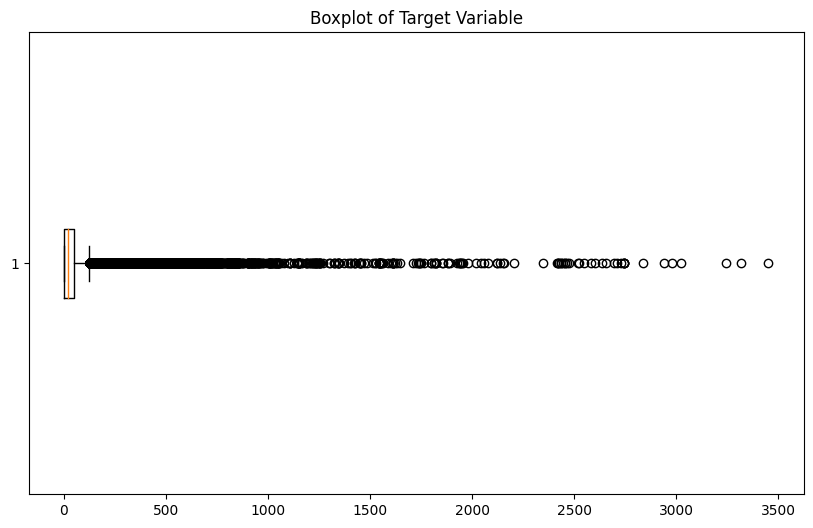

In [30]:
# Plot boxplot of target variable
plt.figure(figsize=(10,6))
plt.boxplot(df['target'], vert=False)
plt.title('Boxplot of Target Variable')
plt.show()

In [31]:

# Count the number of unique values for each column except 'target'
unique_values_count = df.loc[df['target'] > 2000].nunique()

# Convert to a DataFrame for better readability
unique_values_df = unique_values_count.reset_index()
unique_values_df.columns = ['Column', 'Unique Values']

# Display the DataFrame
print(unique_values_df)

             Column  Unique Values
0                id             43
1                ac             17
2            target             42
3    s_std_day_year             30
4    c_std_day_year             30
5           std_day              6
6           sta_day              6
7         std_month             10
8         sta_month             10
9    s_std_time_dec             33
10   c_std_time_dec             31
11  iso_country_dep             12
12         type_dep              2
13  iso_country_arr              8
14         type_arr              2
15  is_same_country              2


In [32]:
# Filter rows where target > 2000
filtered_df = df[df['target'] > 2000]

# List unique values for all columns except 'target'
columns_to_list = [col for col in df.columns if col != "target"]

# Create a dictionary to store unique values for each column
unique_values_dict = {}

for col in columns_to_list:
    unique_values_dict[col] = filtered_df[col].unique()

# Print unique values for each column
for col, unique_values in unique_values_dict.items():
    print(f"Column: {col}")
    print(f"Unique Values: {unique_values}")
    print("-" * 40)

Column: id
Unique Values: ['train_id_2171' 'train_id_10123' 'train_id_11293' 'train_id_24904'
 'train_id_29337' 'train_id_34286' 'train_id_34795' 'train_id_35917'
 'train_id_38972' 'train_id_38983' 'train_id_45733' 'train_id_48878'
 'train_id_50779' 'train_id_51432' 'train_id_51435' 'train_id_54672'
 'train_id_54687' 'train_id_55206' 'train_id_57785' 'train_id_58861'
 'train_id_58862' 'train_id_59199' 'train_id_59709' 'train_id_60836'
 'train_id_61991' 'train_id_64485' 'train_id_64967' 'train_id_77495'
 'train_id_78095' 'train_id_78678' 'train_id_81542' 'train_id_82568'
 'train_id_86009' 'train_id_89042' 'train_id_97997' 'train_id_99221'
 'train_id_99222' 'train_id_99223' 'train_id_99731' 'train_id_100224'
 'train_id_101717' 'train_id_102118' 'train_id_102606']
----------------------------------------
Column: ac
Unique Values: ['TU 320IMW' 'TU 736IOQ' 'TU 32AIMF' 'TU 736IOM' 'TU 320IMS' 'TU 736IOP'
 'TU 32AIMM' 'TU 736ION' 'D4 320CQP' 'TU 320IMV' 'TU 32AIMN' 'TU 32AIML'
 'GJ 734PGC' 'T

In [33]:
# # Remove rows where the target variable is above 2000
# df = df[df['target'] <= 2000]

# # Display the first few rows of the filtered DataFrame
# print(df.head())

In [34]:
# # Plot boxplot of target variable
# plt.figure(figsize=(10,6))
# plt.boxplot(df['target'], vert=False)
# plt.title('Boxplot of Target Variable')
# plt.show()

### Save file

In [35]:
df.to_csv('../data/train_cleaned.csv', index=False)

### interesting features would be (need to impute some rows, missing values):
- iso_country_dep
- iso_country_arr
- continent_arr
- continent_dep
- is_same_country
- type_dep
- type_arr
- days of week
- airline
